In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers

In [2]:
data = pd.read_csv("D:/datasets/DL/mnist_784_csv.csv")
labels = data.iloc[:, 0].values  # Extract labels
images = data.iloc[:, 1:].values / 255.0  # Normalize pixel values between 0 and 1
images = images.reshape(-1, 28, 28, 1)

In [3]:
noise_factor = 0.5
noisy_images = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
noisy_images = np.clip(noisy_images, 0.0, 1.0)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(noisy_images, images, test_size=0.2, random_state=42)

In [5]:
input_img = Input(shape=(28, 28, 1))

In [6]:
# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

In [7]:
# Decoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [8]:
# Compile the model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [9]:
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, validation_data=(x_test, x_test))

Epoch 1/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.5582 - val_loss: 0.4912
Epoch 2/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.4877 - val_loss: 0.4783
Epoch 3/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.4752 - val_loss: 0.4639
Epoch 4/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.4612 - val_loss: 0.4563
Epoch 5/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.4533 - val_loss: 0.4490
Epoch 6/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.4484 - val_loss: 0.4454
Epoch 7/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.4449 - val_loss: 0.4430
Epoch 8/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.4422 - val_loss: 0.4407
Epoch 9/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.4401 - val_loss: 0.4388
Epoch 10/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.4386 - val_loss: 0.4374


In [10]:
denoised_images = autoencoder.predict(x_test)

438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


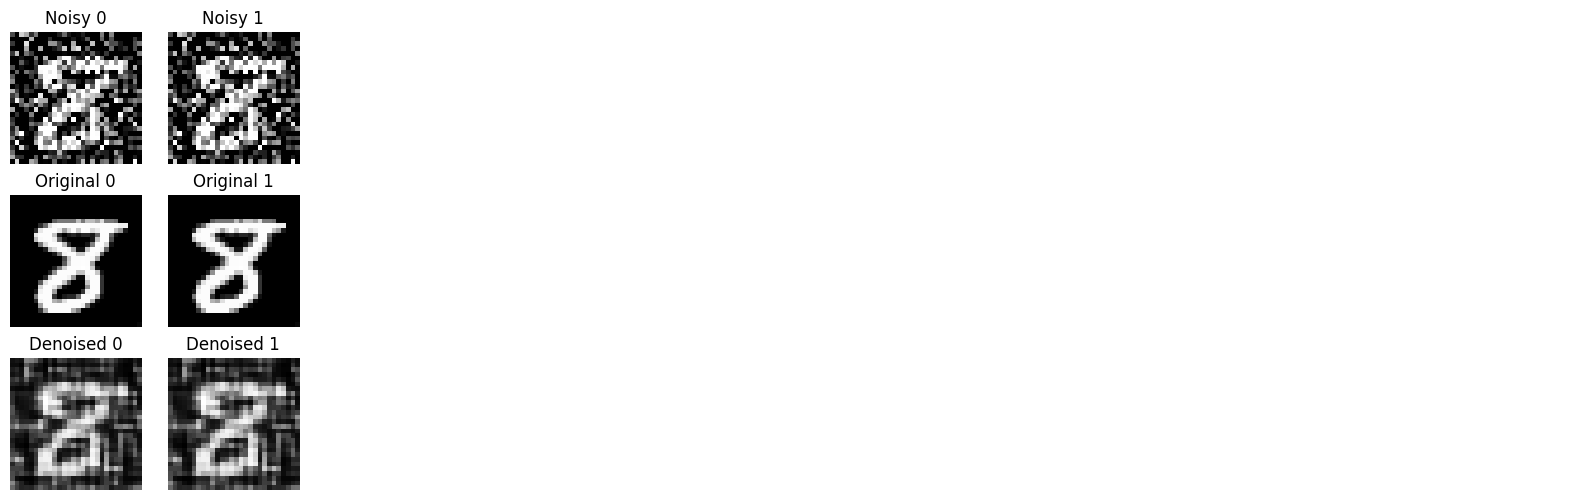

In [11]:
# Display a sample image for each digit (0-9)
fig, axs = plt.subplots(3, 10, figsize=(20, 6))

# Initialize a list to track how many digits we found
found_digits = {digit: False for digit in range(10)}

# Find indices for all digits in y_test
for digit in range(10):
    indices = np.where(y_test == digit)[0]  # Get all indices for the current digit
    if len(indices) > 0:  # Check if there are any indices
        found_digits[digit] = True  # Mark that we've found this digit

        idx = indices[0]  # Take the first index of the digit

        # Original noisy image
        axs[0, digit].imshow(x_test[idx].reshape(28, 28), cmap='gray')
        axs[0, digit].axis('off')
        axs[0, digit].set_title(f"Noisy {digit}")

        # Original clean image
        axs[1, digit].imshow(y_test[idx].reshape(28, 28), cmap='gray')
        axs[1, digit].axis('off')
        axs[1, digit].set_title(f"Original {digit}")

        # Denoised image
        denoised_img = autoencoder.predict(x_test[idx].reshape(1, 28, 28, 1))
        axs[2, digit].imshow(denoised_img.reshape(28, 28), cmap='gray')
        axs[2, digit].axis('off')
        axs[2, digit].set_title(f"Denoised {digit}")

# For digits not found, turn off the axes
for digit in range(10):
    if not found_digits[digit]:
        axs[0, digit].axis('off')
        axs[1, digit].axis('off')
        axs[2, digit].axis('off')

plt.show()
